In [1]:
import os
import cv2
import numpy as np
from skimage import io, exposure, feature, color, transform, filters
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from utils import sliding_window, image_pyramid, compute_hog

## A product logo and its associated HoG

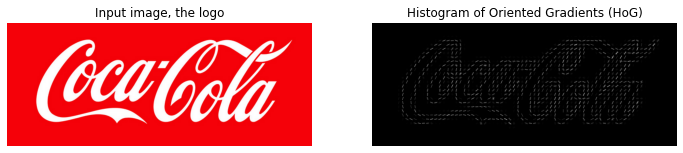

In [2]:
# open image
logo = io.imread("../img/cocacola_logo.png")

(H, hogImage) = feature.hog(logo, orientations=8, pixels_per_cell=(8, 8),
	cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
	visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

# plot original image alongside the HoG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(logo, cmap=plt.cm.gray)
ax1.set_title('Input image, the logo')

ax2.axis('off')
ax2.imshow(hogImage, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients (HoG)')
plt.show()

In [4]:
# dirs
root_dir = "/media/david/TOSHIBA EXT/DavidINLOC/tfmdbs/custom_db_objects"
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "val")

# params
window_shape = (200, 100)

## Train

In [9]:
X = []
y = []
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        
        # read, blur and sharpen
        im = io.imread(image_path)
        
        # blur, sharpen, and compute HoG
        (H, hog_image) = compute_hog(im, window_shape)

        X.append(H)
        y.append(class_name)

        # plt.imshow(hog_image)
        # plt.show()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

## Predict

In [10]:
for class_name in os.listdir(val_dir):
    class_dir = os.path.join(val_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        
        # read, blur and sharpen
        im = io.imread(image_path)

        # blur, sharpen, and compute HoG
        (H, hog_image) = compute_hog(im, window_shape)

        # predict with the trained KNeighbors
        pred = model.predict(H.reshape(1, -1))[0]
        pred_proba = model.predict_proba(H.reshape(1, -1))[0]

        # prediction vs ground truth
        print(f"Prediction: {pred} with {pred_proba}. GT is {class_name}. {pred==class_name}!")


Prediction: none with [0.33333333 0.66666667 0.        ]. GT is cocacola. False!
Prediction: none with [0. 1. 0.]. GT is cocacola. False!
Prediction: none with [0.33333333 0.66666667 0.        ]. GT is cocacola. False!
Prediction: none with [0. 1. 0.]. GT is cocacola. False!
Prediction: none with [0. 1. 0.]. GT is cocacola. False!
Prediction: none with [0. 1. 0.]. GT is cocacola. False!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0. 1. 0.]. GT is none. True!
Prediction: none with [0.         0.66666667 0.33333333]. GT is pepsi. False!
Prediction: none with [0.33333333 0.66666667 0.        ]. GT is pepsi. False!
Prediction: none with [0.33333333 0.66666667 0.        ]. GT is pepsi. False!
Prediction: pepsi with [0.         0.33333333 0.66666667]. GT is

# Inference with sliding window and an image pyramid

In [11]:
img = io.imread("../img/pepsi_alone.jpg")

test_patches = []
predictions = {}
i = 0
for image in image_pyramid(img, window_shape):
    for patch in sliding_window(image, window_shape):
        # predict
        (H, hog_image) = compute_hog(patch, window_shape)
        predicted_class = model.predict(H.reshape(1, -1))[0]
        # store predictions
        if predicted_class in predictions:
            predictions[predicted_class] += 1
        else:
            predictions[predicted_class] = 1
        
        # display patches that arenot "none"
        i += 1
        if predicted_class != "none" or i==358:
            plt.imshow(patch)
            plt.show()
            if i==358:
                io.imsave("pepsi_quenova2.png", patch)

print(predictions)

{'none': 322}
